In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
crime = pd.read_csv("./MTA_Major_Felonies_20250509.csv", parse_dates=["Month"])  # adjust filename
weather = pd.read_csv("./weather_noaa.csv", parse_dates=["DATE"])  # adjust filename

# Peek at the data
crime.head(), weather.head()

(       Month Agency Police Force     Felony Type  Felony Count  \
 0 2019-01-01    MNR        MTAPD        Burglary             1   
 1 2019-01-01    MNR        MTAPD  Felony Assault             3   
 2 2019-01-01    MNR        MTAPD          Murder             0   
 3 2019-01-01    MNR        MTAPD            Rape             0   
 4 2019-01-01    MNR        MTAPD         Robbery             1   
 
    Crimes per Million Riders  
 0                       0.15  
 1                       0.44  
 2                       0.00  
 3                       0.00  
 4                       0.15  ,
        STATION                         NAME  LATITUDE  LONGITUDE  ELEVATION  \
 0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
 1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
 2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
 3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
 4 

In [8]:
monthly_crime = crime.groupby("Month")["Felony Count"].sum().reset_index()
monthly_crime.columns = ["Date", "Total_Crimes"]
monthly_crime.head()

,Date,Total_Crimes
0,2019-01-01,214
1,2019-02-01,207
2,2019-03-01,183
3,2019-04-01,194
4,2019-05-01,215


In [5]:
# Make sure numeric
weather["TMAX"] = pd.to_numeric(weather["TMAX"], errors="coerce")
weather["TMIN"] = pd.to_numeric(weather["TMIN"], errors="coerce")
weather["PRCP"] = pd.to_numeric(weather["PRCP"], errors="coerce")

# Create 'Month' column
weather["Month"] = weather["DATE"].dt.to_period("M").dt.to_timestamp()

# Aggregate
monthly_weather = weather.groupby("Month").agg({
    "TMAX": "mean",
    "TMIN": "mean",
    "PRCP": "sum"
}).reset_index()

monthly_weather.columns = ["Date", "Avg_TMAX", "Avg_TMIN", "Total_PRCP"]
monthly_weather.head()

,Date,Avg_TMAX,Avg_TMIN,Total_PRCP
0,1980-01-01,39.354839,28.000000,1.72
1,1980-02-01,37.931034,24.827586,1.04
2,1980-03-01,48.483871,33.870968,10.41
3,1980-04-01,62.700000,46.333333,8.26
4,1980-05-01,74.612903,56.645161,2.33


In [9]:
df = pd.merge(monthly_crime, monthly_weather, on="Date", how="inner")
df.head()

,Date,Total_Crimes,Avg_TMAX,Avg_TMIN,Total_PRCP
0,2019-01-01,214,39.032258,26.000000,3.58
1,2019-02-01,207,42.642857,29.785714,3.14
2,2019-03-01,183,48.709677,34.741935,3.87
3,2019-04-01,194,63.300000,47.600000,4.55
4,2019-05-01,215,69.935484,54.387097,6.82


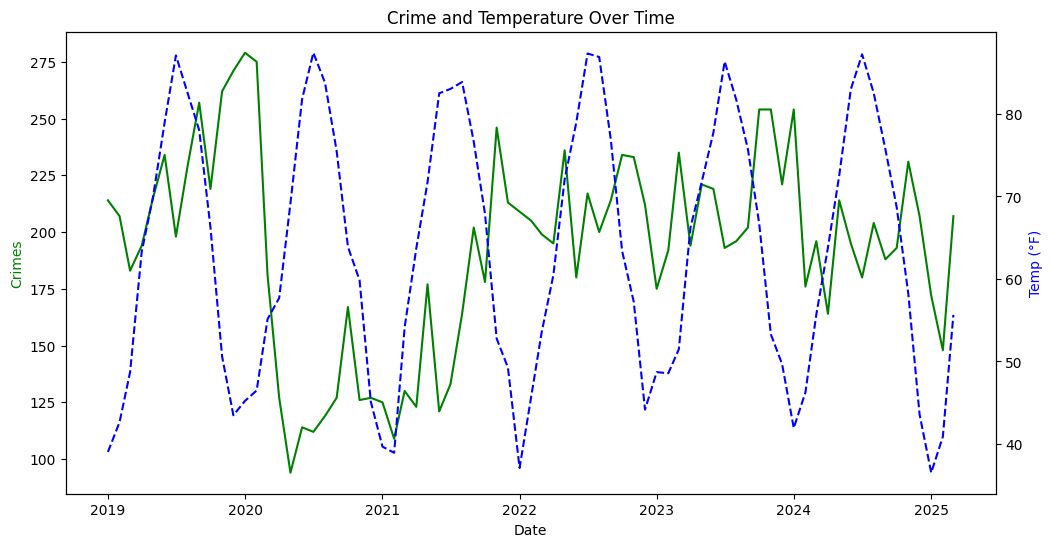

In [10]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.plot(df["Date"], df["Total_Crimes"], 'g-', label="Total Crimes")
ax2.plot(df["Date"], df["Avg_TMAX"], 'b--', label="Avg Max Temp")

ax1.set_ylabel("Crimes", color="g")
ax2.set_ylabel("Temp (°F)", color="b")
ax1.set_xlabel("Date")
plt.title("Crime and Temperature Over Time")
plt.show()

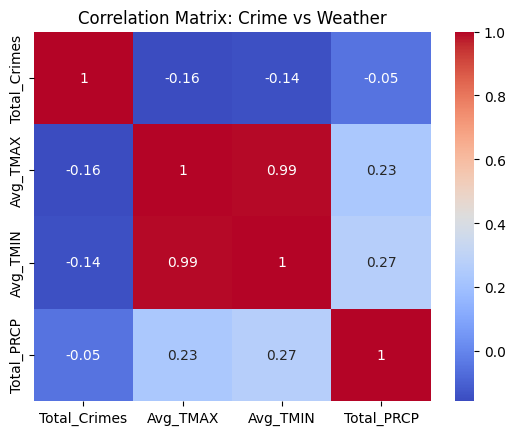

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Crime vs Weather")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

X = df[["Avg_TMAX", "Avg_TMIN", "Total_PRCP"]]
y = df["Total_Crimes"]

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X, y))


Coefficients: [-2.87475096  2.65005661 -0.90350204]
Intercept: 248.0386060832254
R^2 Score: 0.03585194657604951
